 value count of Floor 
 4    1102
Name: 522, dtype: int64
 value count of Building 
 2    1102
Name: 523, dtype: int64
 value count of SpaceID 
 134    30
136    30
129    30
130    21
132    20
131    20
128    20
127    20
126    20
125    20
124    20
123    20
122    20
121    20
120    20
117    20
133    20
115    20
114    20
113    20
112    20
111    20
110    20
109    20
108    20
107    20
106    20
105    20
104    20
103    20
102    20
116    20
101    20
147    20
137    20
138    20
139    20
140    20
141    20
143    20
146    20
135    20
119    19
214    10
211    10
212    10
213    10
219    10
215    10
216    10
217    10
209    10
218    10
210    10
204    10
208    10
207    10
206    10
205    10
203    10
118    10
202    10
201    10
142    10
220     2
Name: 524, dtype: int64
 value count of Unique ID
 42134    30
42136    30
42129    30
42130    21
42132    20
42131    20
42128    20
42127    20
42126    20
42125    20
42124    20
42123    20
42122    2

c:\users\amare\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\cross_validation.py:553: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of labels for any class cannot be less than n_folds=3.
  % (min_labels, self.n_folds)), Warning)


D. TREE [0.79104478 0.82300885 0.78021978]
Feature Importance 
      importance
524    0.055592
520    0.043824
521    0.035889
144    0.029727
137    0.028182
62     0.028067
143    0.023884
248    0.023694
528    0.022777
63     0.022448
480    0.022418
86     0.022114
84     0.021980
397    0.021516
516    0.020698
82     0.020410
138    0.020336
83     0.019467
10     0.018205
495    0.017429
501    0.017152
130    0.016616
127    0.015908
341    0.015510
116    0.014536
510    0.013952
515    0.013201
285    0.012928
11     0.012061
117    0.011385
131    0.011334
77     0.010826
247    0.009971
81     0.009598
163    0.009142
65     0.008325
477    0.008049
76     0.008016
60     0.008004
494    0.007703
478    0.007579
69     0.007576
97     0.007415
276    0.007381
390    0.007369
64     0.007244
126    0.006874
185    0.006656
112    0.006497
281    0.006388
526    0.006261
73     0.005947
385    0.005696
61     0.005616
393    0.005588
527    0.005215
455    0.005131
482    0

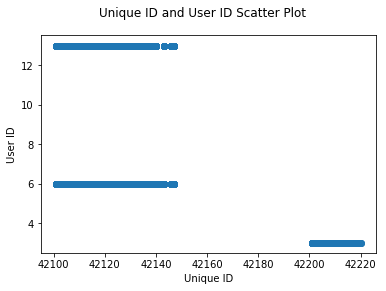

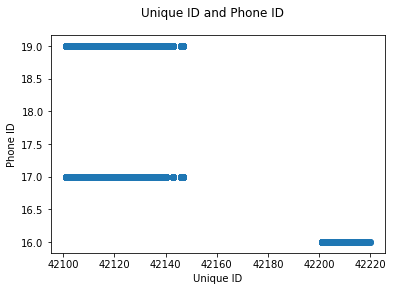

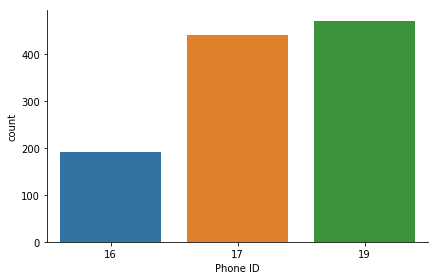

In [8]:
####################################
####################################
#Course 5 Task 4 Capstone - EDA and Data Prep
####################################
####################################


#import numpy, pandas, scipy, matplotlib etc.
import pandas as pd
import matplotlib.pyplot as plt
import scipy
from math import sqrt
import numpy as np
from pandas import Series, DataFrame
import matplotlib as mpl
import seaborn as sns 
import random 
from pandas_ml import ConfusionMatrix
import seaborn as sns 
%matplotlib inline

# set up display area to show dataframe in jupyter qtconsole
pd.set_option('display.height', 1000)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# Set seed
np.random.seed(10)

#import estimators
from sklearn.ensemble import RandomForestClassifier
#from sklearn.svm import SVR
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn import linear_model
from sklearn import svm
from sklearn import tree
from sklearn.ensemble import ExtraTreesClassifier

#Model metrics
from sklearn.metrics import confusion_matrix
from pandas_ml import ConfusionMatrix
from sklearn.metrics import cohen_kappa_score

#Cross validation
from sklearn.cross_validation import cross_val_score

# Import data
path='C:\\Users\\amare\\Documents\\U Texas Austin Data Science\\Capstone\\UJIndoorLoc\\trainingData_F4.csv'
df = pd.read_csv(path, header=None)
#Floor 4 - This provides a dataset with 1102 records
#F3 = (df1[522] == 4) 
#df=df1[F3]

#find nulls
#print("Find Nulls \n")
df.isnull().any()

#features -  select features
features = df.iloc[:, 0:529]
#print('Summary of feature sample \n')
features.head()


#Print Value Count
print(" value count of Floor \n",df[522].value_counts())
print(" value count of Building \n",df[523].value_counts())
print(" value count of SpaceID \n",df[524].value_counts())
print(" value count of Unique ID\n",df[529].value_counts())

#Correlation
#corrMat = df.corr()
#print(corrMat)

#Covariance
#covMat = df.cov()
#print(covMat)


#dependent variable
depVar = df[529]

#Establish the training set for the X-variables or Feature space (70:30)
#Training Set (Feature Space: X Training)
X_train = (features[:-500])
X_train.head()

#Establish the training set for the Y-variable or dependent variable 
#Dependent Variable Training Set (y Training)
y_train = depVar[:-500]
y_train_count = len(y_train.index)
print('The number of observations in the Y training set are:',str(y_train_count))
y_train.head()

#Testing Set (X Testing). Establish the testing set for the X-Variables or Feature space.
X_test = features[-100:]
X_test_count = len(X_test.index)
#print('The number of observations in the feature testing set is:',str(X_test_count))
#print(X_test.head())

#Ground Truth (y_test). Establish Ground truth  
y_test = depVar[:-100]
y_test_count = len(y_test.index)
#print('The number of observations in the Y training set are:',str(y_test_count))
#y_test.head()

# Crossvalidation
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train)
X_train.shape, X_test.shape
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train)
X_train.shape, X_test.shape


#scikit learn format
model = tree.DecisionTreeClassifier()
#model = tree.DecisionTreeClassifier(random_state=20,criterion='gini')
#model = tree.DecisionTreeClassifier(random_state=20,criterion='entropy', splitter = 'random')

####Building model and chosing the right model

#Establish variables that we will use for defining each model.
#Models

modelTREE = tree.DecisionTreeClassifier()
#validate that the correct column is being used for the dependent variable:#dependent variable
#print(depVar)

# Use the model variables established above. Pass the training data. 
model.fit(X_train,y_train)

#RF classification
modelTREE.fit(X_train,y_train)

#classification Model Fitting and Scoring
modelTREE.fit(X_train,y_train)
print("D. TREE", (cross_val_score(modelTREE, X_train, y_train))) 
modelTREE.score(X_train,y_train)

#Make Predictions - SVM
predictions = modelTREE.predict(X_test)

## Import the random forest model.
from sklearn.ensemble import RandomForestClassifier 
## This line instantiates the model. 
rf = RandomForestClassifier() 
## Fit the model on your training data.
rf.fit(X_train, y_train) 
## And score it on your testing data.
rf.score(X_test, y_test)




#Feature Importance
feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance',
                                                                        ascending=False)
#
print("Feature Importance \n",feature_importances)


#SCatter Plot - Unique ID and User ID
import matplotlib.pyplot as plt
x = df[529]
y = df[526]
plt.scatter(x,y)
plt.xlabel("Unique ID")
plt.ylabel("User ID")
plt.suptitle('Unique ID and User ID Scatter Plot')
plt.show()

#SCatter Plot - Phone ID and Unique ID
import matplotlib.pyplot as plt
x = df[529]
y = df[527]
plt.scatter(x,y)
plt.xlabel("Unique ID")
plt.ylabel("Phone ID")
plt.suptitle('Unique ID and Phone ID')
plt.show()

fg = sns.factorplot(527, data=df, kind='count', aspect=1.5)
fg.set_xlabels('Phone ID')
